# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [53]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [54]:
# Your code here
df = pd.read_csv("./data/ames.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [55]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [56]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [57]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

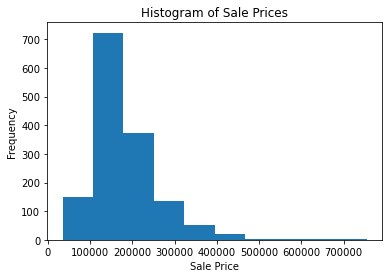

In [58]:
# Your code here
plt.hist(df["SalePrice"])
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Histogram of Sale Prices")
plt.show()

Now, print out the mean, median, and standard deviation:

In [59]:
# Your code here
stats_saleprice = df.groupby('SalePrice').agg(['mean', 'median', 'std'])
stats_saleprice

MSSubClass            LotFrontage             LotArea               \
                mean median std        mean median std     mean   median std   
SalePrice                                                                      
34900           30.0   30.0 NaN        60.0   60.0 NaN   7879.0   7879.0 NaN   
35311           20.0   20.0 NaN        50.0   50.0 NaN   9000.0   9000.0 NaN   
37900           50.0   50.0 NaN        50.0   50.0 NaN   5925.0   5925.0 NaN   
39300           20.0   20.0 NaN        50.0   50.0 NaN   5000.0   5000.0 NaN   
40000           70.0   70.0 NaN        50.0   50.0 NaN   8500.0   8500.0 NaN   
...              ...    ...  ..         ...    ...  ..      ...      ...  ..   
582933          60.0   60.0 NaN       107.0  107.0 NaN  13891.0  13891.0 NaN   
611657          20.0   20.0 NaN       100.0  100.0 NaN  12919.0  12919.0 NaN   
625000          60.0   60.0 NaN       118.0  118.0 NaN  35760.0  35760.0 NaN   
745000          60.0   60.0 NaN       160.0  160.0 NaN  15623.0  15623.0 NaN   
755000          60.0   60.0 NaN       104.0  104.0 NaN  21535.0  21535.0 NaN   

          OverallQual  ... PoolArea MiscVal            MoSold             \
                 mean  ...      std    mean median std   mean median std   
SalePrice              ...                                                 
34900             4.0  ...      NaN     0.0      0 NaN   11.0   11.0 NaN   
35311             2.0  ...      NaN     0.0      0 NaN   10.0   10.0 NaN   
37900             3.0  ...      NaN     0.0      0 NaN    5.0    5.0 NaN   
39300             1.0  ...      NaN     0.0      0 NaN    1.0    1.0 NaN   
40000             4.0  ...      NaN     0.0      0 NaN    7.0    7.0 NaN   
...               ...  ...      ...     ...    ...  ..    ...    ...  ..   
582933            9.0  ...      NaN     0.0      0 NaN    1.0    1.0 NaN   
611657            9.0  ...      NaN     0.0      0 NaN    3.0    3.0 NaN   
625000           10.0  ...      NaN     0.0      0 NaN    7.0    7.0 NaN   
745000           10.0  ...      NaN     0.0      0 NaN    7.0    7.0 NaN   
755000           10.0  ...      NaN     0.0      0 NaN    1.0    1.0 NaN   

           YrSold              
             mean  median std  
SalePrice                      
34900      2009.0  2009.0 NaN  
35311      2006.0  2006.0 NaN  
37900      2009.0  2009.0 NaN  
39300      2007.0  2007.0 NaN  
40000      2008.0  2008.0 NaN  
...           ...     ...  ..  
582933     2009.0  2009.0 NaN  
611657     2010.0  2010.0 NaN  
625000     2006.0  2006.0 NaN  
745000     2007.0  2007.0 NaN  
755000     2007.0  2007.0 NaN  

[663 rows x 108 columns]

In the cell below, interpret the above information.

In [60]:
# Replace None with appropriate text
"""
The mean and median are close together, it suggests that sale prices are evenly distributed.
"""

'\nThe mean and median are close together, it suggests that sale prices are evenly distributed.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

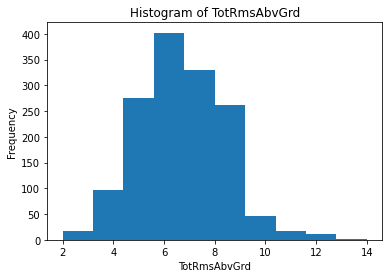

In [61]:
# Your code here
plt.hist(df["TotRmsAbvGrd"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("Frequency")
plt.title("Histogram of TotRmsAbvGrd")
plt.show()

Now, print out the mean, median, and standard deviation:

In [62]:
# Your code here
stats_tot = df.groupby('TotRmsAbvGrd').agg(['mean', 'median', 'std'])
stats_tot

MSSubClass                   LotFrontage                    \
                    mean median        std        mean median        std   
TotRmsAbvGrd                                                               
2              20.000000   20.0        NaN   50.000000   50.0        NaN   
3             123.529412  120.0  53.612169   34.583333   28.5  16.843981   
4              59.896907   30.0  50.512887   56.253333   56.0  21.257173   
5              53.472727   20.0  50.658386   62.439130   60.0  18.956471   
6              53.457711   42.5  42.479092   68.230769   69.0  19.722556   
7              53.844985   50.0  38.247074   71.743191   72.0  21.672910   
8              57.914439   60.0  24.449491   77.839506   76.0  21.391910   
9              63.733333   60.0  34.348112   86.721311   85.0  39.151471   
10             72.659574   60.0  38.233423   83.025641   85.0  21.682502   
11             67.500000   60.0  32.910306   85.000000   85.0  18.165902   
12             72.727273   75.0  15.388898  111.200000   90.5  75.053759   
14            190.000000  190.0        NaN   60.000000   60.0        NaN   

                   LotArea                      OverallQual  ...      MiscVal  \
                      mean median           std        mean  ...          std   
TotRmsAbvGrd                                                 ...                
2              5000.000000   5000           NaN    1.000000  ...          NaN   
3              4390.411765   4426   2732.530879    4.764706  ...     0.000000   
4              7475.268041   7032   4016.889298    5.195876  ...    85.799214   
5              9390.272727   8450   8993.274914    5.454545  ...   940.647270   
6              9350.763682   9000   4084.785746    5.858209  ...   206.548836   
7             11491.069909   9937  12855.667587    6.471125  ...   235.131075   
8             12135.096257  10240  15485.364060    6.631016  ...    97.632400   
9             13554.826667  12205   6610.340766    7.106667  ...   288.675135   
10            13639.765957  12099   7094.943408    7.319149  ...     0.000000   
11            13118.277778  11725   7146.476415    7.555556  ...     0.000000   
12            23088.000000  16692  18253.269263    6.909091  ...  2514.864898   
14            10896.000000  10896           NaN    6.000000  ...          NaN   

                MoSold                        YrSold                   \
                  mean median       std         mean median       std   
TotRmsAbvGrd                                                            
2             1.000000      1       NaN  2007.000000   2007       NaN   
3             5.470588      5  2.874840  2007.882353   2008  1.363926   
4             6.061856      6  2.768176  2008.010309   2008  1.318892   
5             6.403636      6  2.707247  2007.803636   2008  1.274964   
6             6.236318      6  2.726315  2007.820896   2008  1.384907   
7             6.349544      6  2.655415  2007.887538   2008  1.309951   
8             6.374332      6  2.661753  2007.711230   2008  1.336836   
9             6.453333      7  2.722744  2007.586667   2007  1.263771   
10            6.978723      7  2.600078  2007.489362   2007  1.283208   
11            7.166667      7  2.595245  2008.222222   2008  1.308594   
12            5.000000      6  2.932576  2008.181818   2009  1.470930   
14            3.000000      3       NaN  2007.000000   2007       NaN   

                  SalePrice                           
                       mean    median            std  
TotRmsAbvGrd                                          
2              39300.000000   39300.0            NaN  
3             111217.647059  100000.0   33108.103904  
4             122844.628866  120500.0   41661.805370  
5             141550.749091  130250.0   49656.905700  
6             161303.296020  155000.0   48707.372941  
7             196666.784195  184100.0   64404.686026  
8             213427.529412  200000.0   73985.715639  
9          

In the cell below, interpret the above information.

In [63]:
# Replace None with appropriate text
"""
The mean is much higher than the median, it suggests the presence of high-price outliers pulling the average up.
"""

'\nThe mean is much higher than the median, it suggests the presence of high-price outliers pulling the average up.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

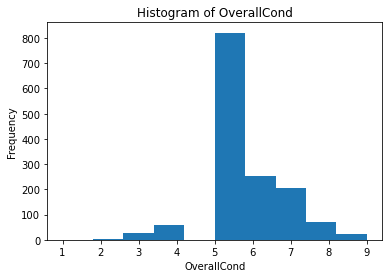

In [64]:
# Your code here
plt.hist(df["OverallCond"])
plt.xlabel("OverallCond")
plt.ylabel("Frequency")
plt.title("Histogram of OverallCond")
plt.show()

Now, print out the mean, median, and standard deviation:

In [65]:
# Your code here
stats_overall = df.groupby('OverallCond').agg(['mean', 'median', 'std'])
stats_overall

MSSubClass                   LotFrontage                    \
                  mean median        std        mean median        std   
OverallCond                                                              
1            30.000000     30        NaN         NaN    NaN        NaN   
2            40.000000     30  20.000000   73.600000   60.0  21.847197   
3            43.200000     20  39.892564   61.550000   54.5  23.533794   
4            71.491228     50  53.635384   72.978261   60.0  30.691649   
5            59.957369     60  42.953797   71.597953   70.0  24.991139   
6            51.071429     45  40.359970   67.941748   70.0  20.119072   
7            50.463415     50  38.190119   68.551515   64.0  26.517920   
8            53.680556     50  40.870743   64.600000   60.5  16.067865   
9            62.727273     70  35.614579   67.866667   60.0  20.852772   

                  LotArea                        OverallQual  ...  \
                     mean   median           std        mean  ...   
OverallCond                                                   ...   
1            10020.000000  10020.0           NaN    1.000000  ...   
2             8756.200000   8967.0   2202.188275    4.800000  ...   
3             9631.840000   8500.0   5647.390346    4.480000  ...   
4            10941.070175   9525.0   6579.162929    4.701754  ...   
5            10610.261876   9600.0  10013.005275    6.595615  ...   
6            10326.527778   9223.5  10826.308942    5.519841  ...   
7            10743.092683   9250.0  11599.716523    5.546341  ...   
8             9308.986111   8432.0   5716.711375    5.666667  ...   
9            11383.636364   9502.5   5112.812278    6.772727  ...   

                 MiscVal    MoSold                        YrSold         \
                     std      mean median       std         mean median   
OverallCond                                                               
1                    NaN  3.000000    3.0       NaN  2009.000000   2009   
2             201.246118  7.400000    6.0  2.880972  2008.400000   2009   
3               0.000000  6.640000    7.0  3.264455  2008.040000   2009   
4              90.379318  6.017544    6.0  3.008863  2007.614035   2007   
5             334.601791  6.377588    6.0  2.737488  2007.757613   2008   
6             157.440016  6.234127    6.0  2.817975  2007.892857   2008   
7             261.818631  6.102439    6.0  2.442324  2007.868293   2008   
8            1827.887259  6.555556    6.0  2.275954  2007.958333   2008   
9             533.001791  6.863636    6.5  2.144660  2008.227273   2008   

                           SalePrice                         
                  std           mean  median            std  
OverallCond                                                  
1                 NaN   61000.000000   61000            NaN  
2            1.816590  141986.400000   85000  141342.813488  
3            1.337909  101929.400000   89500   44852.490403  
4            1.460851  120438.438596  115000   38922.525907  
5            1.339259  203146.914738  185000   85117.319416  
6            1.271989  153961.591270  142750   60737.969824  
7            1.327396  158145.487805  145000   53468.189431  
8            1.304785  155651.736111  142500   52375.144681  
9            1.066004  216004.545455  176200   96485.974689  

[9 rows x 108 columns]

In the cell below, interpret the above information.

In [66]:
# Replace None with appropriate text
"""
The mean is much higher than the median, it suggests the presence of high-price outliers pulling the average up.
"""

'\nThe mean is much higher than the median, it suggests the presence of high-price outliers pulling the average up.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [76]:
# Replace None with appropriate code
below_average_condition = df[df['SalePrice'] < 5]
average_condition = df[df['SalePrice'] == 5]
above_average_condition = df[df['SalePrice'] > 5]


The following code checks that you created the subsets correctly:

In [ ]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 884
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

AssertionError: 

The following code will produce a plot of the distributions of sale price for each of these subsets:

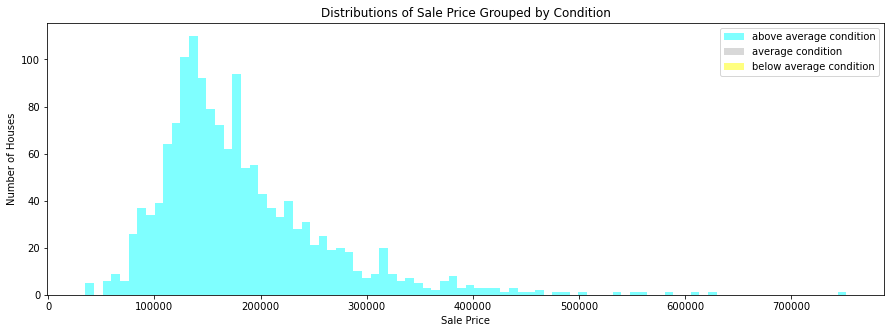

In [69]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [ ]:
# Your code here


Now, find the ***most negatively correlated*** column:

In [ ]:
# Your code here

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

In [ ]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [ ]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

In [ ]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
None
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.